# Importing Libraries & Data

In [1]:
#For Google Colab, use to import data from Google Drive
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#It is a function that render the figure in a notebook
%matplotlib inline
#To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [2]:
#Adds functionality for accessing file on Google Drive
#https://pypi.org/project/PyDrive/
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

In [3]:
#Authenticate users to have access to Google Drive. Click the link to get the code
#A separate Google Window will open in your broswer to authenticate
#Copy code and paste it in into Google Colab. Hit enter
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#This mounts your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSC680/tab2_CLEAN.csv')

# Exploratory Analysis

In [ ]:
df

,Package Size Name,Material Id,Brand,ProdCategory,SoldToCorporate Entity,SoldToBanner,SoldToRegional,SoldToPartner,Date,Week,Year,Value
0,P_15,M_32,B_1,C_1,SC_25,SB_35,SR_45,SP_88,1/5/2019,1,2019,NaN
1,P_15,M_33,B_1,C_1,SC_25,SB_151,SR_169,SP_591,1/5/2019,1,2019,NaN
2,P_15,M_33,B_1,C_1,SC_25,SB_35,SR_45,SP_92,1/5/2019,1,2019,NaN
3,P_15,M_33,B_1,C_1,SC_25,SB_468,SR_503,SP_1636,1/5/2019,1,2019,NaN
4,P_15,M_33,B_1,C_1,SC_25,SB_26,SR_36,SP_3504,1/5/2019,1,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
246517,P_15,M_18,B_1,C_1,SC_1177,SB_1161,SR_1215,SP_4066,3/20/2022,12,2022,2830.0
246518,P_15,M_13,B_1,C_1,NaN,SB_104,SR_122,SP_605,3/20/2022,12,2022,3885.0
246519,P_15,M_14,B_1,C_1,NaN,SB_104,SR_122,SP_604,3/20/2022,12,2022,1020.0
246520,P_15,M_15,B_1,C_1,NaN,SB_248,SR_279,SP_955,3/20/2022,12,2022,0.0


In [ ]:
df.tail()

,Package Size Name,Material Id,Brand,ProdCategory,SoldToCorporate Entity,SoldToBanner,SoldToRegional,SoldToPartner,Date,Week,Year,Value
246517,P_15,M_18,B_1,C_1,SC_1177,SB_1161,SR_1215,SP_4066,3/20/2022,12,2022,2830.0
246518,P_15,M_13,B_1,C_1,NaN,SB_104,SR_122,SP_605,3/20/2022,12,2022,3885.0
246519,P_15,M_14,B_1,C_1,NaN,SB_104,SR_122,SP_604,3/20/2022,12,2022,1020.0
246520,P_15,M_15,B_1,C_1,NaN,SB_248,SR_279,SP_955,3/20/2022,12,2022,0.0
246521,P_15,M_18,B_1,C_1,NaN,SB_248,SR_279,SP_961,3/20/2022,12,2022,8955.0


In [ ]:
#Length of the column name list must equal the number of columns data type
print('Column list length: ', len(df)) #length
print('Number of columns in dataframe: ', len(df.columns)) #number of columns

Column list length:  246522
Number of columns in dataframe:  12


In [ ]:
#Rename Value variable to Cases
df.rename(columns ={'Value': 'Cases'}, inplace = True)

In [ ]:
#Column Names
df_varNames = list(df.columns)
print("\ndf column names:")
print(df_varNames)


df column names:
['Package Size Name', 'Material Id', 'Brand', 'ProdCategory', 'SoldToCorporate Entity', 'SoldToBanner', 'SoldToRegional', 'SoldToPartner', 'Date', 'Week', 'Year', 'Cases']


In [ ]:
#Descriptive Stats
pd.set_option('display.float_format', lambda x: '% .1f' % x)
df.describe()

,Week,Year,Cases
count,246522.0,246522.0,124999.0
mean,24.6,2020.3,380.8
std,14.9,1.0,795.7
min,1.0,2019.0,-1575.0
25%,12.0,2019.0,51.0
50%,23.0,2020.0,180.0
75%,37.0,2021.0,441.0
max,52.0,2022.0,27900.0


In [ ]:
#Data type
df.dtypes

Package Size Name          object
Material Id                object
Brand                      object
ProdCategory               object
SoldToCorporate Entity     object
SoldToBanner               object
SoldToRegional             object
SoldToPartner              object
Date                       object
Week                        int64
Year                        int64
Cases                     float64
dtype: object

In [ ]:
#Look to see if there are any Null values in dataset
df.isnull().sum()

Package Size Name              0
Material Id                    0
Brand                          0
ProdCategory                   0
SoldToCorporate Entity      2353
SoldToBanner                1629
SoldToRegional              1629
SoldToPartner               1629
Date                           0
Week                           0
Year                           0
Cases                     121523
dtype: int64

In [ ]:
#See how many null values you have total in the data
df.isnull().sum().sum()

128763

In [ ]:
#See which columns have null values
df.isnull().any()

Package Size Name         False
Material Id               False
Brand                     False
ProdCategory              False
SoldToCorporate Entity     True
SoldToBanner               True
SoldToRegional             True
SoldToPartner              True
Date                      False
Week                      False
Year                      False
Cases                      True
dtype: bool

# Cleaning Data - Removing Nulls

In [ ]:
#Remove Nulls in columns - SoldToCorporate Entity, SoldToBanner, SoldTo Regional, SoldToPartner, Keeping nulls under Value
df.dropna(subset = ['SoldToCorporate Entity'], how = 'all', inplace = True)
df.dropna(subset = ['SoldToBanner'], how = 'all', inplace = True)
df.dropna(subset = ['SoldToRegional'], how = 'all', inplace = True)
df.dropna(subset = ['SoldToPartner'], how = 'all', inplace = True)

In [ ]:
#Replace nulls for Value column with zeros
df['Cases'] = df['Cases'].replace(np.nan,0)

In [ ]:
#Verify all null values have been dropped
df.isnull().sum()

Package Size Name         0
Material Id               0
Brand                     0
ProdCategory              0
SoldToCorporate Entity    0
SoldToBanner              0
SoldToRegional            0
SoldToPartner             0
Date                      0
Week                      0
Year                      0
Cases                     0
dtype: int64

In [ ]:
#Once all nulls were dropped went from 246,522 to 242,540
df

,Package Size Name,Material Id,Brand,ProdCategory,SoldToCorporate Entity,SoldToBanner,SoldToRegional,SoldToPartner,Date,Week,Year,Cases
0,P_15,M_32,B_1,C_1,SC_25,SB_35,SR_45,SP_88,1/5/2019,1,2019,0.0
1,P_15,M_33,B_1,C_1,SC_25,SB_151,SR_169,SP_591,1/5/2019,1,2019,0.0
2,P_15,M_33,B_1,C_1,SC_25,SB_35,SR_45,SP_92,1/5/2019,1,2019,0.0
3,P_15,M_33,B_1,C_1,SC_25,SB_468,SR_503,SP_1636,1/5/2019,1,2019,0.0
4,P_15,M_33,B_1,C_1,SC_25,SB_26,SR_36,SP_3504,1/5/2019,1,2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
246513,P_15,M_18,B_1,C_1,SC_1177,SB_104,SR_122,SP_605,3/20/2022,12,2022,4125.0
246514,P_15,M_18,B_1,C_1,SC_1177,SB_564,SR_599,SP_1903,3/20/2022,12,2022,2265.0
246515,P_15,M_18,B_1,C_1,SC_1177,SB_1161,SR_1215,SP_4066,3/20/2022,12,2022,2487.0
246516,P_15,M_18,B_1,C_1,SC_1177,SB_104,SR_122,SP_604,3/20/2022,12,2022,765.0


In [ ]:
#New Descriptive Stats with dropped Nulls
df.describe()

,Week,Year,Cases
count,242540.0,242540.0,242540.0
mean,24.6,2020.3,181.5
std,14.9,1.0,452.6
min,1.0,2019.0,-1575.0
25%,12.0,2019.0,0.0
50%,23.0,2020.0,0.0
75%,37.0,2021.0,180.0
max,52.0,2022.0,16785.0


# Bar Charts

<function matplotlib.pyplot.show>

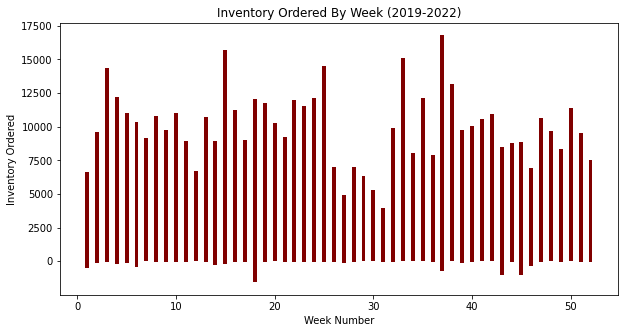

In [ ]:
#Creating a bar plot - Inventory Ordered vs. Week Number 
plot1 = plt.figure(figsize = (10, 5))
plt.bar(df.Week, df.Cases, color = 'maroon', width = 0.4)
plt.xlabel('Week Number')
plt.ylabel('Inventory Ordered')
plt.title('Inventory Ordered By Week (2019-2022)')
plt.show

<BarContainer object of 242540 artists>

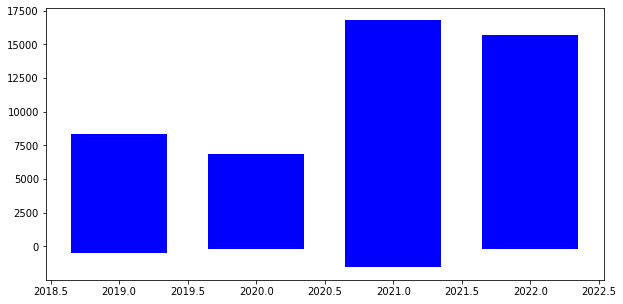

In [ ]:
#Creating the bar plot (Inventory Ordered by Year)
plot2 = plt.figure(figsize = (10, 5))
plt.bar(df.Year, df.Cases, color = 'blue', width = 0.7)

<function matplotlib.pyplot.show>

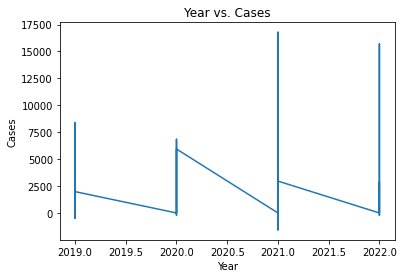

In [ ]:
#Line Graph
plt.plot(df.Year, df.Cases)
plt.title('Year vs. Cases')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show

Figure 7.1: Cases Sold by Year from 2019-2022


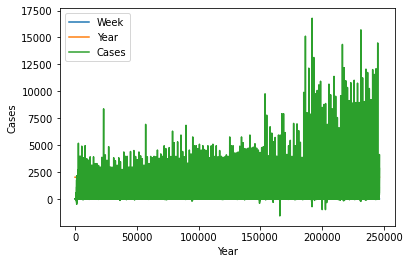

In [ ]:
ax = df.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Cases")
print("Figure 7.1: Cases Sold by Year from 2019-2022")

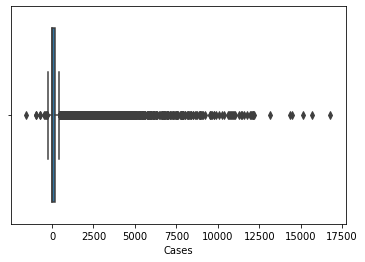

In [ ]:
#Outliers - Cases
import seaborn as sns
sns.boxplot(x=df['Cases'])
plt.show()      

# Load in dataset for Modeling

In [6]:
df1 = pd.read_csv('/content/drive/MyDrive/DSC680/tab2_CLEAN2.csv')

In [7]:
df1

,Date,Cases
0,1/5/2019,124211
1,1/12/2019,199806
2,1/19/2019,202162
3,1/26/2019,219981
4,2/2/2019,204627
...,...,...
176,5/21/2022,301779
177,5/28/2022,344532
178,6/4/2022,313851
179,6/11/2022,366778


In [8]:
df1.describe()

,Cases
count,181.000000
mean,263006.165746
std,45466.067879
min,124211.000000
25%,223718.000000
50%,266784.000000
75%,293140.000000
max,372116.000000


In [9]:
#Drop Null Values
df1 = df1.dropna()
df1

,Date,Cases
0,1/5/2019,124211
1,1/12/2019,199806
2,1/19/2019,202162
3,1/26/2019,219981
4,2/2/2019,204627
...,...,...
176,5/21/2022,301779
177,5/28/2022,344532
178,6/4/2022,313851
179,6/11/2022,366778


In [10]:
#Verify all null values have been dropped
df1.isnull().sum()

Date     0
Cases    0
dtype: int64

In [11]:
df1.dtypes

Date     object
Cases     int64
dtype: object

In [12]:
#https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

In [13]:
df1

,Cases
Date,
2019-01-05,124211
2019-01-12,199806
2019-01-19,202162
2019-01-26,219981
2019-02-02,204627
...,...
2022-05-21,301779
2022-05-28,344532
2022-06-04,313851


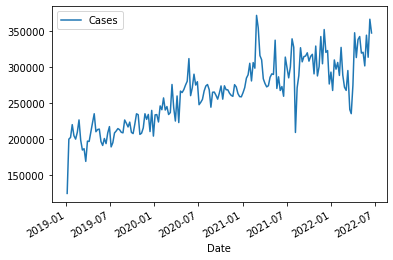

In [17]:
df1.plot()

# Dickey Fuller Autocorrelation & Partial Autocorrelation

In [ ]:
#Dickey-Fuller
#P-value: .714 > .05
from statsmodels.tsa.stattools import adfuller
def ad_test(df1):
  df1test = adfuller(df1, autolag = 'AIC')
  print("1. ADF : ", df1test[0])
  print("2. P-Value : ", df1test[1])
  print("3. Num Of Lags : ", df1test[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", 
df1test[3])
  print("5. Critical Values :")
  for key, val in df1test[4].items():
    print("\t",key, ": ", val)

ad_test(df1['Cases'])

1. ADF :  -1.10032072775768
2. P-Value :  0.7149439856922629
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 174
5. Critical Values :
	 1% :  -3.4685016947910636
	 5% :  -2.8782983668563396
	 10% :  -2.57570415906989


In [ ]:
#Dickey-Fuller
#From the below, we can conclude that the data is non-stationary. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model
#Next compare ADF Test to critical value
!pip install pmdarima
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0.01, False)

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/
df1['1st Order Differencng'] = df1['Cases'] - df1['Cases'].shift(30)
df1['2nd Order Differencing'] = df1['Cases'] - df1['Cases'].shift(12)

In [ ]:
adfuller(df1['1st Order Differencng'].dropna())

(-6.039591339909521,
 1.356011520996061e-07,
 1,
 149,
 {'1%': -3.4750180242954167,
  '10%': -2.577221358046935,
  '5%': -2.8811408028842043},
 3187.0413776070213)

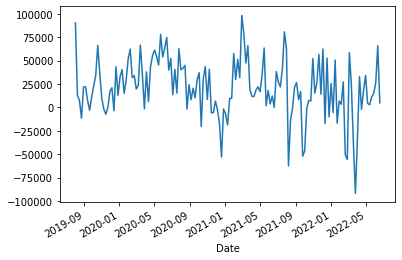

In [ ]:
df1['1st Order Differencng'].plot()

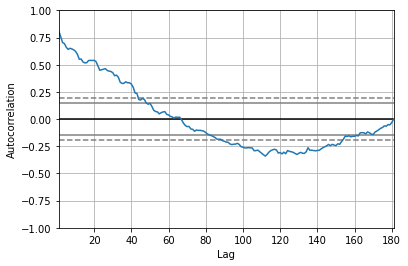

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Cases'])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


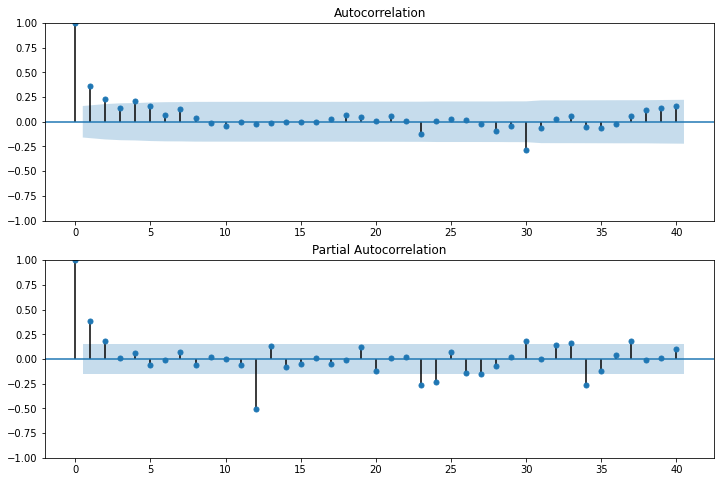

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['1st Order Differencng'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['2nd Order Differencing'].dropna(),lags=40,ax=ax2)

# ARIMA

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
#ARIMA Model 1.1
import statsmodels.api
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
statsmodels.tsa.arima.model.ARIMA
model=ARIMA(df1['Cases'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cases   No. Observations:                  181
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2071.362
Date:                Fri, 12 Aug 2022   AIC                           4148.723
Time:                        17:22:15   BIC                           4158.302
Sample:                             0   HQIC                          4152.607
                                - 181                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4912      0.070      7.042      0.000       0.355       0.628
ma.L1         -0.8455      0.055    -15.313      0.000      -0.954      -0.737
sigma2      5.085e+08   9.05e-11   5.62e+18      0.000    5.08e+08    5.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.69   Jarque-Bera (JB):               110.68
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.46e+34. Standard errors may be unstable.
"""

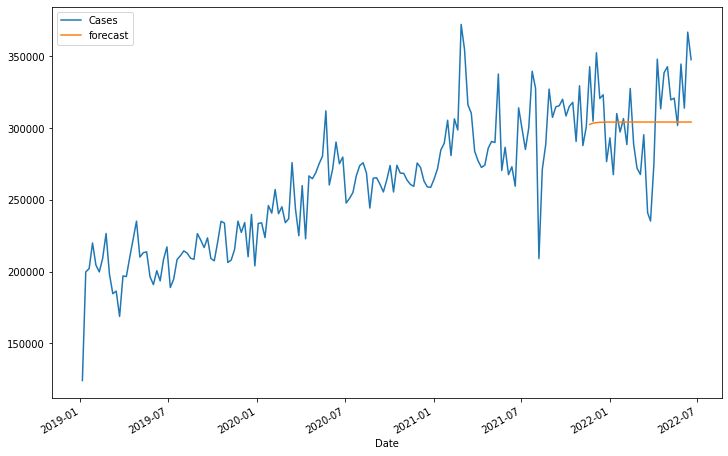

In [ ]:
#ARIMA Model 1.1
#ARIMA is a striaght line MODEL 1 
#ARIMA at 1,1,1
#Run different iterations
df1['forecast']=model_fit.predict(start=150,end=180,dynamic=True) #last 30 weeks (180-150=30)
df1[['Cases','forecast']].plot(figsize=(12,8))

In [ ]:
df1['forecast']

Date
2019-01-05              NaN
2019-01-12              NaN
2019-01-19              NaN
2019-01-26              NaN
2019-02-02              NaN
                  ...      
2022-05-21    304176.535934
2022-05-28    304176.535942
2022-06-04    304176.535946
2022-06-11    304176.535948
2022-06-18    304176.535949
Name: forecast, Length: 181, dtype: float64

In [ ]:
df1['forecast'].tail(30)

Date
2021-11-27    303367.528648
2021-12-04    303779.123068
2021-12-11    303981.312744
2021-12-18    304080.635435
2021-12-25    304129.426239
2022-01-01    304153.394000
2022-01-08    304165.167809
2022-01-15    304170.951518
2022-01-22    304173.792680
2022-01-29    304175.188359
2022-02-05    304175.873966
2022-02-12    304176.210760
2022-02-19    304176.376205
2022-02-26    304176.457477
2022-03-05    304176.497401
2022-03-12    304176.517013
2022-03-20    304176.526647
2022-03-26    304176.531380
2022-04-02    304176.533705
2022-04-09    304176.534847
2022-04-16    304176.535408
2022-04-23    304176.535683
2022-04-30    304176.535819
2022-05-07    304176.535885
2022-05-14    304176.535918
2022-05-21    304176.535934
2022-05-28    304176.535942
2022-06-04    304176.535946
2022-06-11    304176.535948
2022-06-18    304176.535949
Name: forecast, dtype: float64

In [ ]:
#Lower and upper bounds
#ci = confidence intervals
#alpha = .10 (would be 90% confidence level)
fcast = model_fit.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    342421.933796  21866.249269  306455.154378  378388.713214


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
#Ends on 181, 182 is a forecast!!!
print(model_fit.forecast(steps=2))

181    342421.933796
182    328115.598320
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
# confidence level is at the default, 95%
#These are all future values!!!!!!
#under mean are predicted values
#In excel plot the mean values and plot the indexes as dates (182 = 6/26/2022, etc.)
fcast_res2 = model_fit.get_forecast(steps=30)
print(fcast_res2.summary_frame(alpha = .05))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    342421.933796  21866.249269  299564.872752  385278.994840
182    328115.598320  24048.164133  280982.062725  375249.133915
183    329879.321392  25632.448707  279640.645090  380117.997694
184    328606.844988  25923.093575  277798.515213  379415.174763
185    328793.238057  26591.116224  276675.607949  380910.868164
186    328331.036961  27053.054450  275308.024568  381354.049355
187    328159.380349  27580.615284  274102.367721  382216.392978
188    327859.755751  28059.940624  272863.282720  382856.228782
189    327618.658009  28542.304600  271676.768957  383560.547062
190    327352.973822  29006.408704  270501.457441  384204.490202
191    327099.734834  29462.426323  269354.440343  384845.029325
192    326842.432770  29906.702848  268226.372292  385458.493248
193    326588.418262  30341.556020  267120.061229  386056.775296
194    326334.409770  30766.636242  266032.910810  386635.908730
195    326081.863771  311

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


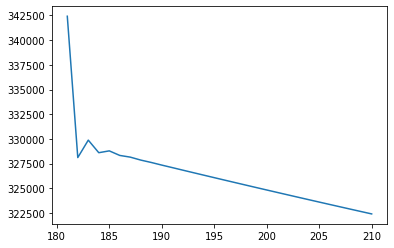

In [ ]:
#Plotting best ARIMA
future = model_fit.get_forecast(steps = 30).summary_frame()
future['mean'].plot()

In [ ]:
#ARIMA Model 1.2
model=ARIMA(df1['Cases'],order=(1,0,2))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cases   No. Observations:                  181
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2072.291
Date:                Fri, 12 Aug 2022   AIC                           4154.583
Time:                        17:34:40   BIC                           4170.575
Sample:                             0   HQIC                          4161.066
                                - 181                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.63e+05   5.47e+04      4.805      0.000    1.56e+05     3.7e+05
ar.L1          0.9938      0.008    131.596      0.000       0.979       1.009
ma.L1         -0.5704      0.086     -6.600      0.000      -0.740      -0.401
ma.L2         -0.1288      0.074     -1.747      0.081      -0.273       0.016
sigma2      5.056e+08      0.928   5.45e+08      0.000    5.06e+08    5.06e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                73.08
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.05   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.35e+25. Standard errors may be unstable.
"""

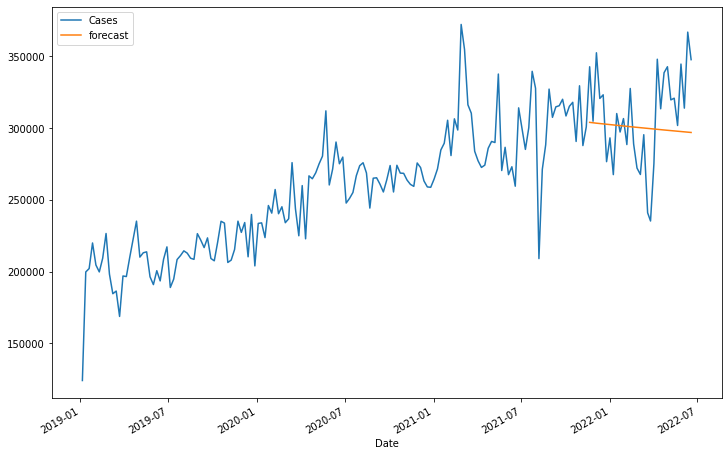

In [ ]:
#ARIMA Model 1.2
df1['forecast']=model_fit.predict(start=150,end=180,dynamic=True)
df1[['Cases','forecast']].plot(figsize=(12,8))

In [ ]:
#Find MSE and confidence intervals
fcast = model_fit.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    335522.917499  22485.500586  298537.560307  372508.274691


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
#ARIMA Model 1.3
model=ARIMA(df1['Cases'],order=(0,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cases   No. Observations:                  181
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2074.132
Date:                Wed, 10 Aug 2022   AIC                           4152.264
Time:                        02:50:20   BIC                           4158.650
Sample:                             0   HQIC                          4154.853
                                - 181                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3266      0.040     -8.259      0.000      -0.404      -0.249
sigma2      5.086e+08   2.12e-11    2.4e+19      0.000    5.09e+08    5.09e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):               196.00
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               2.28   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

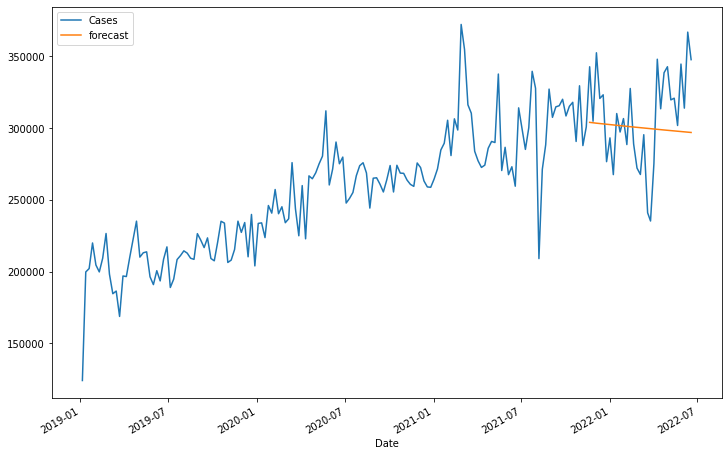

In [ ]:
#ARIMA Model 1.3
df1['forecast']=model_fit.predict(start=150,end=180,dynamic=True)
df1[['Cases','forecast']].plot(figsize=(12,8))

In [ ]:
#Find MSE and confidence intervals
fcast = model_fit.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    335522.917499  22485.500586  298537.560307  372508.274691


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
#ARIMA Model 1.4
model=ARIMA(df1['Cases'],order=(0,0,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Cases   No. Observations:                  181
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2155.342
Date:                Fri, 12 Aug 2022   AIC                           4316.684
Time:                        17:37:08   BIC                           4326.279
Sample:                             0   HQIC                          4320.574
                                - 181                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.63e+05   6386.889     41.179      0.000     2.5e+05    2.76e+05
ma.L1          0.5806      0.111      5.225      0.000       0.363       0.798
sigma2      1.798e+09      0.014   1.27e+11      0.000     1.8e+09     1.8e+09
===================================================================================
Ljung-Box (L1) (Q):                  18.12   Jarque-Bera (JB):                 3.59
Prob(Q):                              0.00   Prob(JB):                         0.17
Heteroskedasticity (H):               1.22   Skew:                             0.24
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.23e+31. Standard errors may be unstable.
"""

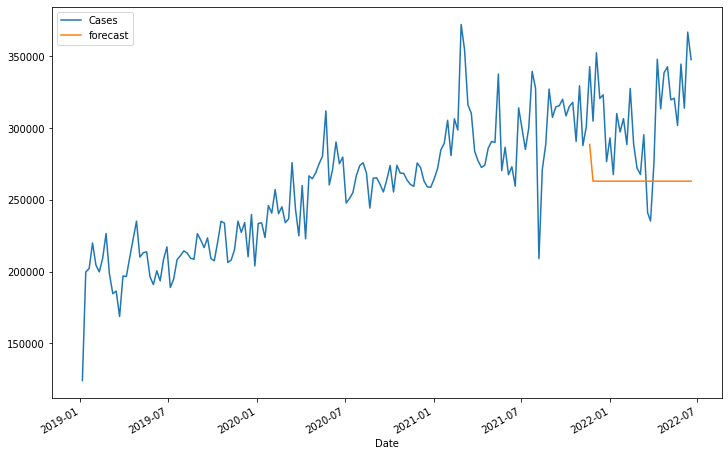

In [ ]:
#ARIMA Model 1.4
df1['forecast']=model_fit.predict(start=150,end=180,dynamic=True)
df1[['Cases','forecast']].plot(figsize=(12,8))

In [ ]:
#Find MSE and confidence intervals
fcast = model_fit.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    278949.495899  42403.929122  209201.239285  348697.752512


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


# SARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


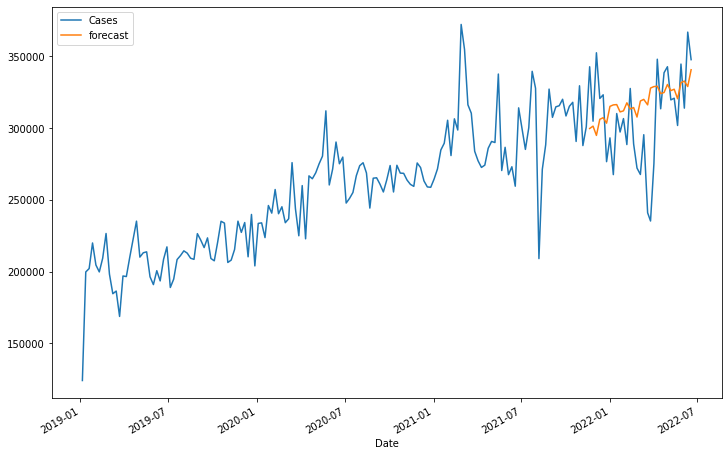

In [ ]:
#SARIMA - Model 2.1
#pick best ARIMA number in Order()
#Run a couple different verisons of SARIMA (4-5)
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1['Cases'],order=(1, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()
df1['forecast']=results.predict(start=150,end=180,dynamic=True)
df1[['Cases','forecast']].plot(figsize=(12,8))

In [ ]:
#SARIMA Results Model 2.1
results.summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Cases   No. Observations:                  181
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1954.194
Date:                            Fri, 12 Aug 2022   AIC                           3916.389
Time:                                    17:39:35   BIC                           3928.885
Sample:                                         0   HQIC                          3921.460
                                            - 181                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2207      0.276      0.800      0.424      -0.320       0.761
ma.L1         -0.5920      0.227     -2.604      0.009      -1.038      -0.147
ma.S.L12      -0.8273      0.092     -9.031      0.000      -1.007      -0.648
sigma2      1.033e+09      3e-10   3.44e+18      0.000    1.03e+09    1.03e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                68.01
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.6e+34. Standard errors may be unstable.
"""

In [ ]:
#Find MSE and confidence intervals
fcast =results.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    348860.224852  32151.898284  295975.058345  401745.391358


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


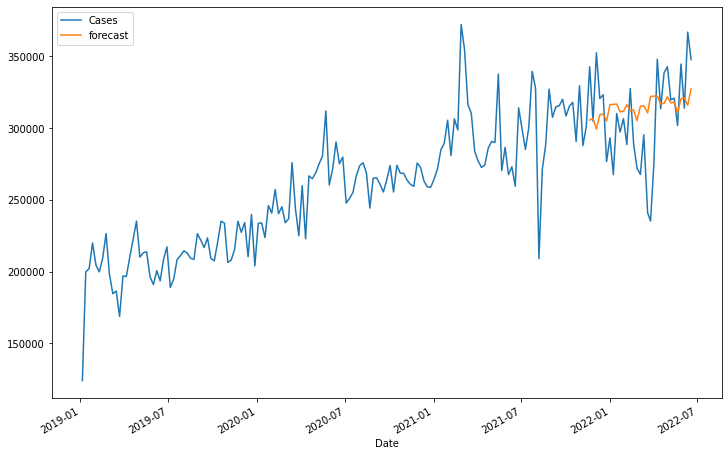

In [ ]:
#SARIMA - Model 2.2
model=sm.tsa.statespace.SARIMAX(df1['Cases'],order=(1, 0, 2),seasonal_order=(0,1,1,12))
results=model.fit()
df1['forecast']=results.predict(start=150,end=180,dynamic=True)
df1[['Cases','forecast']].plot(figsize=(12,8))

In [ ]:
#SARIMA Results Model 2.2
results.summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Cases   No. Observations:                  181
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -1960.017
Date:                              Fri, 12 Aug 2022   AIC                           3930.034
Time:                                      17:47:23   BIC                           3945.683
Sample:                                           0   HQIC                          3936.385
                                              - 181                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9932      0.006    156.628      0.000       0.981       1.006
ma.L1         -0.5871      0.140     -4.185      0.000      -0.862      -0.312
ma.L2         -0.2514      0.126     -2.001      0.045      -0.498      -0.005
ma.S.L12      -0.8429      0.096     -8.751      0.000      -1.032      -0.654
sigma2      9.782e+08   4.84e-11   2.02e+19      0.000    9.78e+08    9.78e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                37.43
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               2.48   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.94e+35. Standard errors may be unstable.
"""

In [ ]:
#Find MSE and confidence intervals
fcast =results.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    325104.604546  31293.939095  273630.655325  376578.553767


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


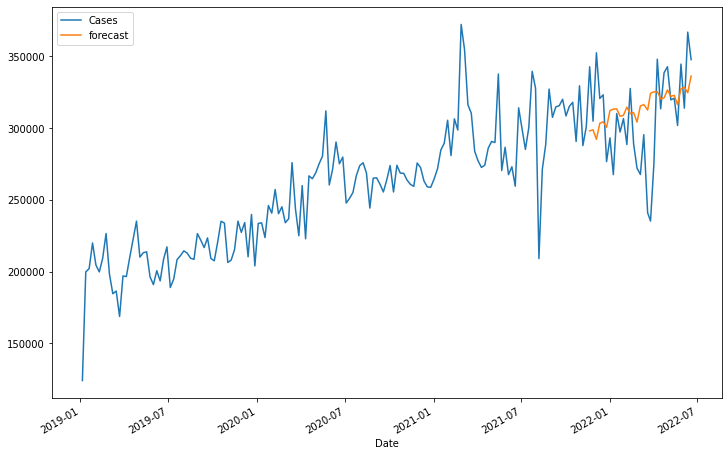

In [ ]:
#SARIMA - Model 2.3
model=sm.tsa.statespace.SARIMAX(df1['Cases'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()
df1['forecast']=results.predict(start=150,end=180,dynamic=True)
df1[['Cases','forecast']].plot(figsize=(12,8))

In [ ]:
#SARIMA Results Model 2.3
results.summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Cases   No. Observations:                  181
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1954.523
Date:                            Fri, 12 Aug 2022   AIC                           3915.046
Time:                                    17:48:34   BIC                           3924.418
Sample:                                         0   HQIC                          3918.850
                                            - 181                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3967      0.130     -3.043      0.002      -0.652      -0.141
ma.S.L12      -0.8253      0.089     -9.230      0.000      -1.001      -0.650
sigma2      1.035e+09   4.13e-11    2.5e+19      0.000    1.04e+09    1.04e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                83.13
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.92e+35. Standard errors may be unstable.
"""

In [ ]:
df1['forecast']

Date
2019-01-05              NaN
2019-01-12              NaN
2019-01-19              NaN
2019-01-26              NaN
2019-02-02              NaN
                  ...      
2022-05-21    316179.573600
2022-05-28    327381.602162
2022-06-04    328393.061326
2022-06-11    324553.758237
2022-06-18    336194.478118
Name: forecast, Length: 181, dtype: float64

In [ ]:
df1['forecast'].tail(30)

Date
2021-11-27    298747.730362
2021-12-04    292119.882675
2021-12-11    303321.911237
2021-12-18    304333.370401
2021-12-25    300494.067312
2022-01-01    312134.787193
2022-01-08    313194.572031
2022-01-15    313323.665564
2022-01-22    308204.504448
2022-01-29    308905.498768
2022-02-05    314527.976364
2022-02-12    310019.802960
2022-02-19    310777.575825
2022-02-26    304149.728137
2022-03-05    315351.756700
2022-03-12    316363.215863
2022-03-20    312523.912774
2022-03-26    324164.632656
2022-04-02    325224.417493
2022-04-09    325353.511026
2022-04-16    320234.349910
2022-04-23    320935.344231
2022-04-30    326557.821826
2022-05-07    322049.648423
2022-05-14    322807.421287
2022-05-21    316179.573600
2022-05-28    327381.602162
2022-06-04    328393.061326
2022-06-11    324553.758237
2022-06-18    336194.478118
Name: forecast, dtype: float64

In [ ]:
#Lower and upper bounds
#ci = confidence intervals
#alpha = .10 (would be 90% confidence level)
fcast = results.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    353075.739471  32189.570465  300128.607741  406022.871201


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
#Ends on 181, 182 is a forecast!!!
print(results.forecast(steps=2))

181    353075.739471
182    372087.905728
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
# confidence level is at the default, 95%
#These are all future values!!!!!!
#under mean are predicted values
#In excel plot the mean values and plot the indexes as dates (182 = 6/26/2022, etc.)
fcast_res2 = results.get_forecast(steps=30)
print(fcast_res2.summary_frame(alpha = .05))

Cases           mean        mean_se  mean_ci_lower  mean_ci_upper
181    353075.739471   32189.570465  289985.340681  416166.138261
182    372087.905728   37594.321486  298404.389592  445771.421864
183    360689.537426   42314.271505  277755.089244  443623.985607
184    366927.684355   46558.158679  275675.370158  458179.998552
185    368856.673609   50446.275452  269983.790568  467729.556650
186    372763.235489   54055.446307  266816.507560  478709.963419
187    363245.632257   57438.278576  250668.674914  475822.589599
188    359482.246931   60632.667933  240644.401495  478320.092367
189    368792.295854   63666.985222  244007.297814  493577.293893
190    368292.667452   66563.125101  237831.339555  498753.995348
191    361968.500513   69338.671960  226067.200735  497869.800291
192    366284.767007   72006.484307  225154.651112  507414.882901
193    370558.264911   76242.630247  221125.455540  519991.074281
194    389570.431168   79585.081433  233586.537852  545554.324483
195    378

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


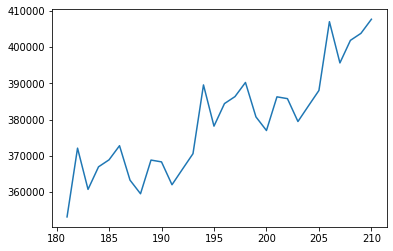

In [ ]:
#Plotting best fit model
future = results.get_forecast(steps = 30).summary_frame()
future['mean'].plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


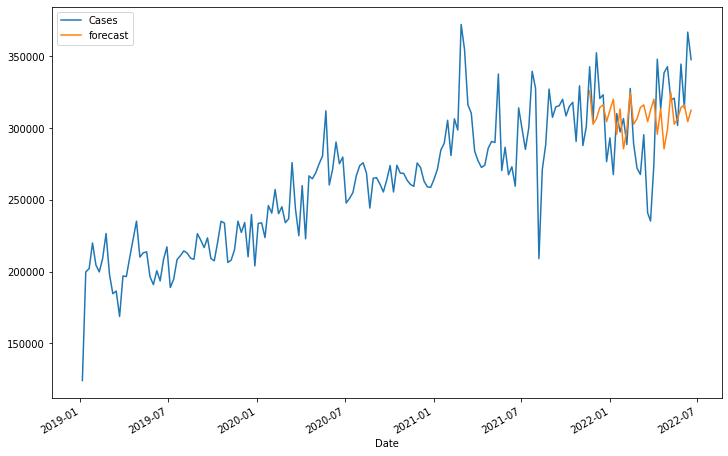

In [ ]:
#SARIMA - Model 2.4
model=sm.tsa.statespace.SARIMAX(df1['Cases'],order=(0, 0, 1),seasonal_order=(0,1,1, 12))
results=model.fit()
df1['forecast']=results.predict(start=150,end=180,dynamic=True)
df1[['Cases','forecast']].plot(figsize=(12,8))

In [ ]:
#SARIMA Results Model 2.4
results.summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Cases   No. Observations:                  181
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1992.965
Date:                            Fri, 12 Aug 2022   AIC                           3991.931
Time:                                    17:50:09   BIC                           4001.320
Sample:                                         0   HQIC                          3995.741
                                            - 181                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3612      0.076      4.743      0.000       0.212       0.510
ma.S.L12      -0.1605      0.049     -3.291      0.001      -0.256      -0.065
sigma2      1.146e+09   1.25e-11   9.14e+19      0.000    1.15e+09    1.15e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               117.30
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               3.20   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.15e+35. Standard errors may be unstable.
"""

In [ ]:
#Find MSE and confidence intervals
fcast = results.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases          mean       mean_se  mean_ci_lower  mean_ci_upper
181    296336.89771  33851.803928   240655.63524  352018.160179


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


# Prediction

In [ ]:
#Predicted
#Compared predicted vs. actuals
#Actual/forcast * 100
#NaN is b/c I only went back 30 weeks 
#On average over 30 weeks
df1['forecast']

Date
2019-01-05              NaN
2019-01-12              NaN
2019-01-19              NaN
2019-01-26              NaN
2019-02-02              NaN
                  ...      
2022-05-21    316179.573600
2022-05-28    327381.602162
2022-06-04    328393.061326
2022-06-11    324553.758237
2022-06-18    336194.478118
Name: forecast, Length: 181, dtype: float64

In [ ]:
#THIS IS WHAT I NEED - COMPARE IN EXCEL TO DOC YOU UPLOADED
df1['forecast'].tail(30)

Date
2021-11-27    298747.730362
2021-12-04    292119.882675
2021-12-11    303321.911237
2021-12-18    304333.370401
2021-12-25    300494.067312
2022-01-01    312134.787193
2022-01-08    313194.572031
2022-01-15    313323.665564
2022-01-22    308204.504448
2022-01-29    308905.498768
2022-02-05    314527.976364
2022-02-12    310019.802960
2022-02-19    310777.575825
2022-02-26    304149.728137
2022-03-05    315351.756700
2022-03-12    316363.215863
2022-03-20    312523.912774
2022-03-26    324164.632656
2022-04-02    325224.417493
2022-04-09    325353.511026
2022-04-16    320234.349910
2022-04-23    320935.344231
2022-04-30    326557.821826
2022-05-07    322049.648423
2022-05-14    322807.421287
2022-05-21    316179.573600
2022-05-28    327381.602162
2022-06-04    328393.061326
2022-06-11    324553.758237
2022-06-18    336194.478118
Name: forecast, dtype: float64

In [ ]:
#Lower and upper bounds
#ci = confidence intervals
#alpha = .10 (would be 90% confidence level)
fcast = results.get_forecast()
print(fcast.summary_frame(alpha=.10))

Cases           mean       mean_se  mean_ci_lower  mean_ci_upper
181    353075.739471  32189.570465  300128.607741  406022.871201


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
#Ends on 181, 182 is a forecast!!!
print(results.forecast(steps=2))

181    353075.739471
182    372087.905728
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
# confidence level is at the default, 95%
#These are all future values!!!!!!
#under mean are predicted values
#In excel plot the mean values and plot the indexes as dates (182 = 6/26/2022, etc.)
fcast_res2 = results.get_forecast(steps=30)
print(fcast_res2.summary_frame(alpha = .05))

Cases           mean        mean_se  mean_ci_lower  mean_ci_upper
181    353075.739471   32189.570465  289985.340681  416166.138261
182    372087.905728   37594.321486  298404.389592  445771.421864
183    360689.537426   42314.271505  277755.089244  443623.985607
184    366927.684355   46558.158679  275675.370158  458179.998552
185    368856.673609   50446.275452  269983.790568  467729.556650
186    372763.235489   54055.446307  266816.507560  478709.963419
187    363245.632257   57438.278576  250668.674914  475822.589599
188    359482.246931   60632.667933  240644.401495  478320.092367
189    368792.295854   63666.985222  244007.297814  493577.293893
190    368292.667452   66563.125101  237831.339555  498753.995348
191    361968.500513   69338.671960  226067.200735  497869.800291
192    366284.767007   72006.484307  225154.651112  507414.882901
193    370558.264911   76242.630247  221125.455540  519991.074281
194    389570.431168   79585.081433  233586.537852  545554.324483
195    378

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


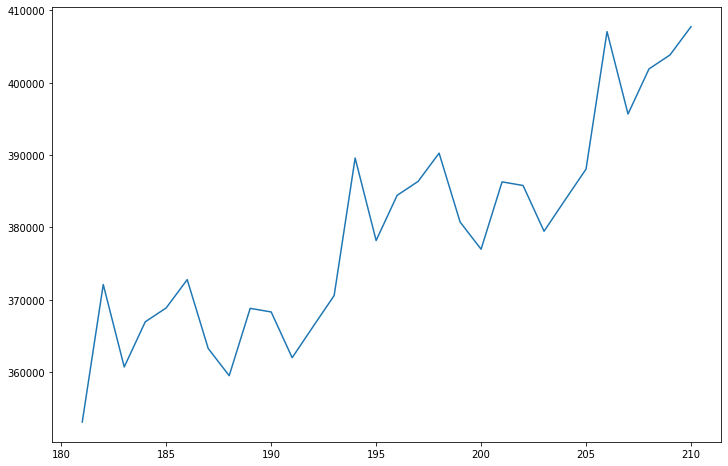

In [ ]:
future = results.get_forecast(steps = 30).summary_frame()
future['mean'].plot()

In [ ]:
future_df1['forecast']

2019-01-05   NaN
2019-01-12   NaN
2019-01-19   NaN
2019-01-26   NaN
2019-02-02   NaN
              ..
2024-07-18   NaN
2024-08-18   NaN
2024-09-18   NaN
2024-10-18   NaN
2024-11-18   NaN
Name: forecast, Length: 210, dtype: float64

<function matplotlib.pyplot.show>

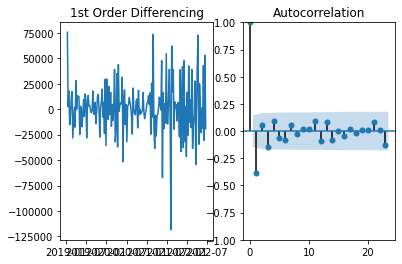

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df1.Cases.diff())

ax2 = f.add_subplot(122)
plot_acf(df1.Cases.diff().dropna(), ax=ax2)
plt.show

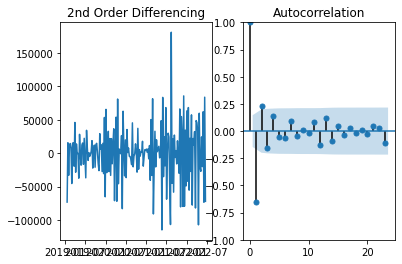

In [ ]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df1.Cases.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df1.Cases.diff().diff().dropna(), ax=ax2)
plt.show()

In [ ]:
#Step 3: Dickey-Fuller w/ Differencing
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1.Cases.dropna())
print('p-value: ', result[1])

result = adfuller(df1.Cases.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df1.Cases.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.7149439856922629
p-value:  9.692228796183636e-14
p-value:  2.3091863508450002e-14


In [ ]:
#Fitting an ARIMA Model
import statsmodels.api
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
statsmodels.tsa.arima.model.ARIMA
arima_model = ARIMA(df1.Cases, order =(1,1,2))
model = arima_model.fit()
print(model.summary)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x7f37a5f1b350>>


In [ ]:
def ad_test(df1):
  df1test = adfuller(df1, autolag = 'AIC')
  print("1. ADF : ", df1test[0])
  print("2. P-Value : ", df1test[1])
  print("3. Num Of Lags : ", df1test[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", 
df1test[3])
  print("5. Critical Values :")
  for key, val in df1test[4].items():
    print("\t",key, ": ", val)

ad_test(df1['Cases'])

1. ADF :  -1.10032072775768
2. P-Value :  0.7149439856922629
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 174
5. Critical Values :
	 1% :  -3.4685016947910636
	 5% :  -2.8782983668563396
	 10% :  -2.57570415906989


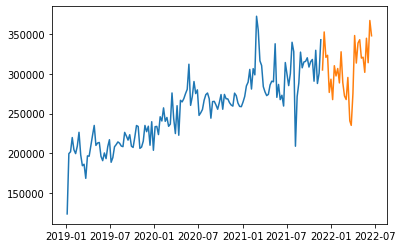

In [ ]:
#Split Into Train and Test Datasets
train = df1.Cases[:-30] #Last 30 weeks
test = df1.Cases[-30:] #Reserve last 30 days as testing section
plt.plot(train)
plt.plot(test)

In [ ]:
#Trying p,d,q values 0-5 to get better optimal results
from pmdarima import auto_arima
arima_model = auto_arima(train,start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                         D=1, start_Q=0, max_P=5, max_D=5,
                         max_Q=5, m=12, seasonal=True,
                         error_action='warn', trace=True,
                         supress_warnings=True,stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3289.405, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3220.781, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3207.137, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3267.490, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3208.918, Time=0.32 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3208.969, Time=1.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3216.860, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3210.419, Time=0.87 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3224.192, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3208.011, Time=0.36 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3208.893, Time=0.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3212.449, Time=0.22 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=3208.344, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=3206.546, Time=0.67 sec
 ARIMA(0,1,1)(0,1,0

In [ ]:
#Summary of Model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1599.273
Date:                            Tue, 09 Aug 2022   AIC                           3206.546
Time:                                    23:20:43   BIC                           3218.255
Sample:                                         0   HQIC                          3211.304
                                            - 151                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -694.2736    572.374     -1.213      0.225   -1816.107     427.560
ma.L1         -0.3854      0.131     -2.940      0.003      -0.642      -0.128
ma.S.L12      -0.7930      0.092     -8.624      0.000      -0.973      -0.613
sigma2      9.345e+08      0.000   7.05e+12      0.000    9.35e+08    9.35e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               136.40
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.64   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.41e+29. Standard errors may be unstable.
"""

In [ ]:
#Forecasting on test data
prediction = pd.DataFrame(arima_model.predict(n_periods = 30), index=test.index) #last 30 weeks
prediction.columns=['predicted_cases']
prediction

,predicted_cases
Date,
2021-11-27,320565.751467
2021-12-04,311085.713618
2021-12-11,320110.891789
2021-12-18,317570.795212
2021-12-25,310259.935789
2022-01-01,318001.865378
2022-01-08,316504.066832
2022-01-15,312119.767117
2022-01-22,303375.500809


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


<function matplotlib.pyplot.show>

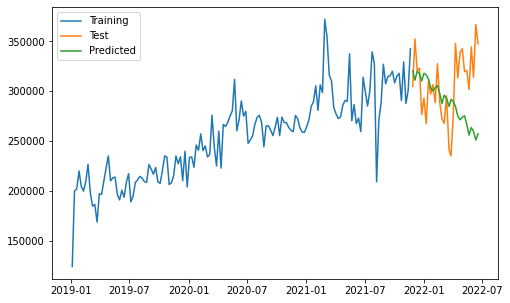

In [ ]:
#Graph
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'left corner')
plt.show

# SARIMA - Attempt 2

In [ ]:
# https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873
#dataframe opertations - pandas
import pandas as pd
#plotting data - matplotlib
from matplotlib import pyplot as plt
#time series - statsmodels 
#Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
#holt winters 
# ingle exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
#double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DSC680/tab2_CLEAN2.csv')

In [ ]:
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

In [ ]:
# finding shape of the dataframe
print(df1.shape)

(181, 1)


In [ ]:
# having a look at the data
print(df1.head())

             Cases
Date              
2019-01-05  124211
2019-01-12  199806
2019-01-19  202162
2019-01-26  219981
2019-02-02  204627


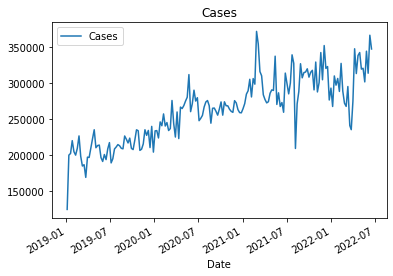

In [ ]:
# plotting the original data
df1[['Cases']].plot(title='Cases')

In [ ]:
fig = seasonal_decompose(df1['Cases'], extrapolate_trend='freq', period=52) #52 weeks in a year

In [ ]:
result = seasonal_decompose(df1, model = 'additive', extrapolate_trend='freq', period=52)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2019-01-05    181579.652147
2019-01-12    182614.565818
2019-01-19    183649.479488
2019-01-26    184684.393159
2019-02-02    185719.306829
                  ...      
2022-05-21    315903.020376
2022-05-28    316367.715514
2022-06-04    316832.410651
2022-06-11    317297.105789
2022-06-18    317761.800926
Name: trend, Length: 181, dtype: float64
Date
2019-01-05   -22654.740708
2019-01-12    -9150.981852
2019-01-19     1995.539023
2019-01-26     9086.961340
2019-02-02     9307.280292
                  ...     
2022-05-21     2577.686407
2022-05-28     2230.031801
2022-06-04    -5862.880016
2022-06-11    10754.551917
2022-06-18     1702.902118
Name: seasonal, Length: 181, dtype: float64
Date
2019-01-05   -34713.911440
2019-01-12    26342.416034
2019-01-19    16516.981489
2019-01-26    26209.645501
2019-02-02     9600.412879
                  ...     
2022-05-21   -16701.706783
2022-05-28    25934.252685
2022-06-04     2881.469365
2022-06-11    38726.342295
2022-06-18    28146.29695

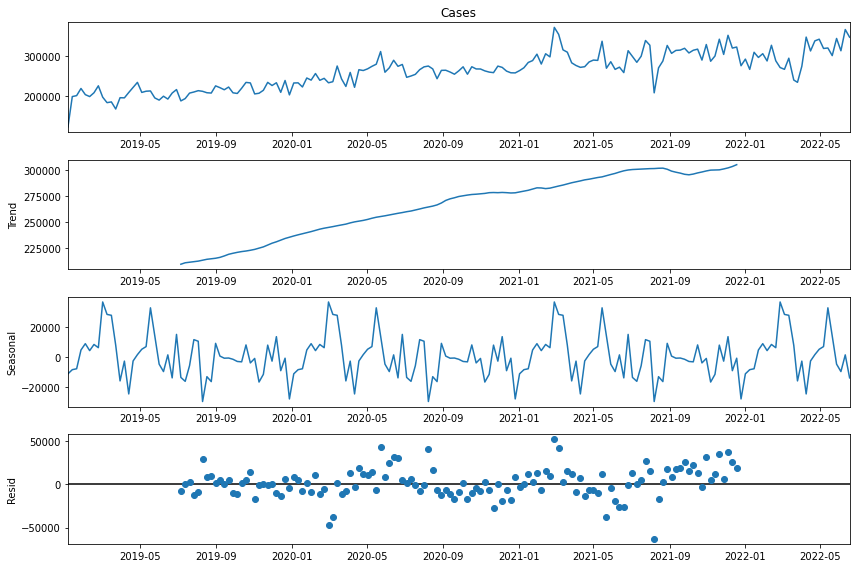

In [ ]:
#https://www.kaggle.com/code/viridisquotient/sarima
#Can put this in my EDA - not strong seasonlity
decompose_result = seasonal_decompose(df1['Cases'], model = 'additive', period=52) #52 weeks in a year, looking at the dataset by week
plt.rcParams['figure.figsize'] = (12, 8) 
decompose_result.plot();

In [ ]:
#Dicky Fuller
from statsmodels.tsa.stattools import adfuller
df1test = adfuller(df1['Cases'], autolag='AIC')
df1output = pd.Series(df1test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df1test[4].items():
    df1output['Critical Value (%s)'%key] = value
df1output

Test Statistic                  -1.100321
p-value                          0.714944
#Lags Used                       6.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64

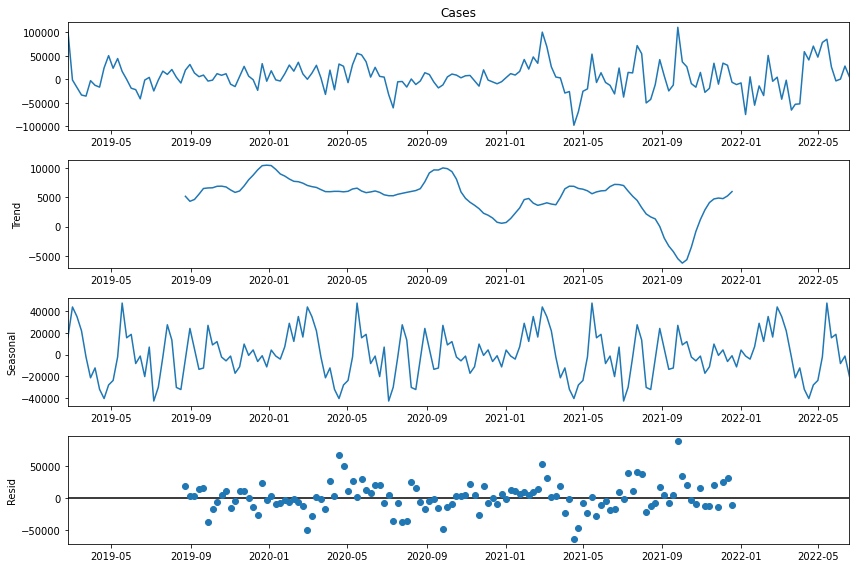

In [ ]:
#Apply a seasonal difference
#See if we can remove trend by taking a seasonal difference
diff_7 = df1['Cases'].diff(7)
diff_7.dropna(inplace=True)
plt.rcParams['figure.figsize'] = (12, 8) 
fig = seasonal_decompose(diff_7, model='additive', period=52).plot()

In [ ]:
#Dicky Fuller
#Now our p-value is <.05 and suggests that the trend has been removed 
df1test = adfuller(diff_7, autolag='AIC')
df1output = pd.Series(df1test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df1test[4].items():
    df1output['Critical Value (%s)'%key] = value
df1output

Test Statistic                  -4.374458
p-value                          0.000329
#Lags Used                      14.000000
Number of Observations Used    159.000000
Critical Value (1%)             -3.472161
Critical Value (5%)             -2.879895
Critical Value (10%)            -2.576557
dtype: float64

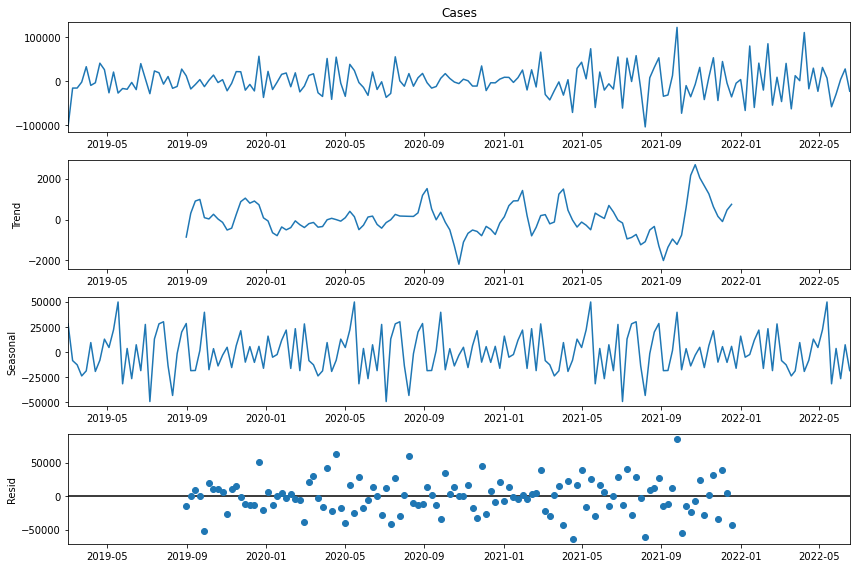

In [ ]:
#Take first Differences to remove the trend further
diff_1_7 = diff_7.diff(1)
diff_1_7.dropna(inplace=True)
plt.rcParams['figure.figsize'] = (12, 8) 
fig = seasonal_decompose(diff_1_7, model='additive', period = 52).plot()

In [ ]:
#Dicky Fuller
#The trend has now been eliminated
df1test = adfuller(diff_1_7, autolag='AIC')
df1output = pd.Series(df1test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df1test[4].items():
    df1output['Critical Value (%s)'%key] = value
df1output

Test Statistic                -6.157967e+00
p-value                        7.290216e-08
#Lags Used                     1.400000e+01
Number of Observations Used    1.580000e+02
Critical Value (1%)           -3.472431e+00
Critical Value (5%)           -2.880013e+00
Critical Value (10%)          -2.576619e+00
dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


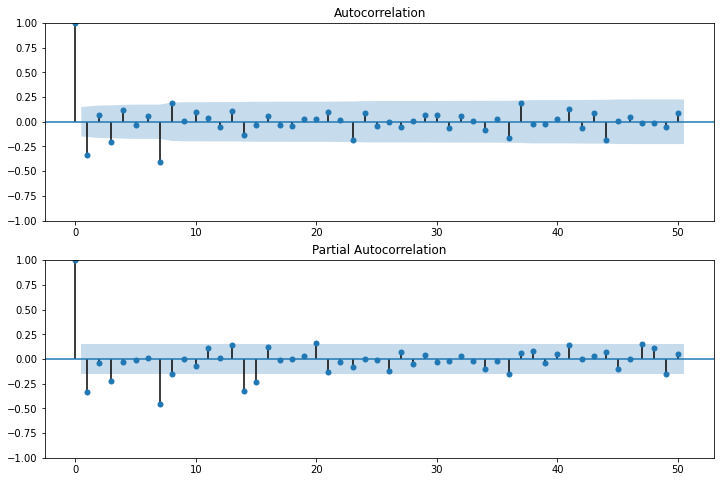

In [ ]:
#Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig, ax = plt.subplots(2)
ax[0] = sm.graphics.tsa.plot_acf(diff_1_7, lags=50, ax=ax[0])
ax[1] = sm.graphics.tsa.plot_pacf(diff_1_7, lags=50, ax=ax[1])

In [ ]:
#Build Model
#Do I need a freq here? In Kaggle the person used D, but I couldn't get that to work
sarima = sm.tsa.statespace.SARIMAX(df1['Cases'], trend='n', enforce_invertibility=False,
                                   order=(6, 1, 1), seasonal_order=(1, 1, 1, 52)) #could run 6, 1, 2, run another round with another differencing with different iterations of the 6, 1, 1
results = sarima.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                     SARIMAX Results                                      
Dep. Variable:                              Cases   No. Observations:                  181
Model:             SARIMAX(6, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1489.379
Date:                            Wed, 10 Aug 2022   AIC                           2998.759
Time:                                    00:30:47   BIC                           3027.279
Sample:                                         0   HQIC                          3010.347
                                            - 181                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2203      0.433     -0.509      0.611      -1.069       0.628
ar.L2         -0.0445      0.187   

In [ ]:
sarima = sm.tsa.statespace.SARIMAX(df1['Cases'], trend='n', enforce_invertibility=False,
                                   order=(0, 0, 1)) #seasonal_order=(1, 1, 1, 52)) #could run 0, 1, 2, run another round with another differencing
results = sarima.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Cases   No. Observations:                  181
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -2456.256
Date:                Wed, 10 Aug 2022   AIC                           4916.513
Time:                        00:54:29   BIC                           4922.910
Sample:                             0   HQIC                          4919.106
                                - 181                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9104      0.111      8.181      0.000       0.692       1.129
sigma2       7.19e+10   1.28e-13   5.61e+23      0.000    7.19e+10    7.19e+10
Ljung-Box (L1) (Q):                  46.70   Jarque-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(0,0,1))
res = mod.filter(fit_res.params)

In [ ]:
df1

,Cases,fcst
Date,,
2019-01-05,124211,0.0
2019-01-12,199806,0.0
2019-01-19,202162,0.0
2019-01-26,219981,0.0
2019-02-02,204627,0.0
...,...,...
2022-05-21,301779,0.0
2022-05-28,344532,0.0
2022-06-04,313851,0.0


In [ ]:
df1['fcst'] = results.predict(start='2019-01-05', end='2022-06-18', dynamic=True)

In [ ]:
df1['fcst']

Date
2019-01-05    0.0
2019-01-12    0.0
2019-01-19    0.0
2019-01-26    0.0
2019-02-02    0.0
             ... 
2022-05-21    0.0
2022-05-28    0.0
2022-06-04    0.0
2022-06-11    0.0
2022-06-18    0.0
Name: fcst, Length: 181, dtype: float64

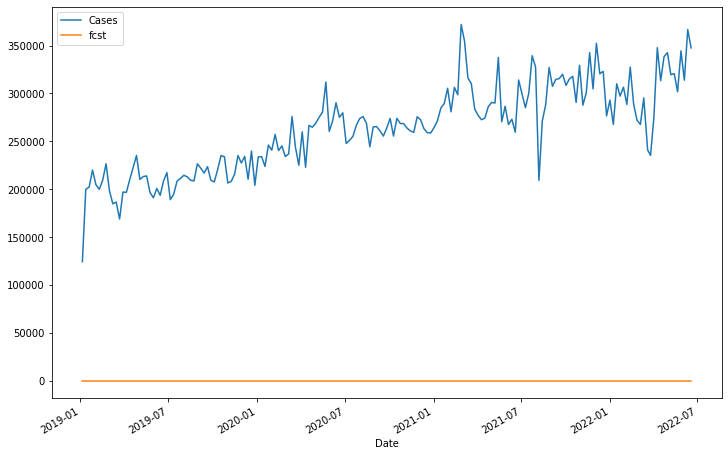

In [ ]:
#Forecast
df1[['Cases', 'fcst']].loc['2019-01-05':].plot();